In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importing seaborn sets nice default options for plotting but is not necessary
import seaborn as sns

In [3]:
import calliope

In [4]:
# Creating a new Model object without any parameters loads the built-in example model

model = calliope.Model()

In [5]:
# This constructs and solves the model, then loads the results into `model.solution`

model.run()

In [6]:
# `node` is a 4-dimensional panel object with node-level variables,
# indexed by variable (labels), technology (items), timestep (major_axis),
# and location (minor_axis)

model.solution.node

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 4 (labels) x 6 (items) x 120 (major_axis) x 5 (minor_axis)
Labels axis: rs to e:power
Items axis: ccgt to unmet_demand_power
Major_axis axis: 2005-01-01 00:00:00 to 2005-01-05 23:00:00
Minor_axis axis: csp1 to r2

In [7]:
# Taking 'e:power', we get a 3-dimensional panel

model.solution.node['e:power']

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 120 (major_axis) x 5 (minor_axis)
Items axis: ccgt to unmet_demand_power
Major_axis axis: 2005-01-01 00:00:00 to 2005-01-05 23:00:00
Minor_axis axis: csp1 to r2

In [8]:
# By summing over the last axis (0-indexed, so there are axes 0, 1, 2),
# we get a 2-dimensional dataframe of power output by technology and timestep

model.solution.node['e:power'].sum(2).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2005-01-01 00:00:00 to 2005-01-05 23:00:00
Freq: H
Data columns (total 6 columns):
ccgt                  120 non-null float64
csp                   120 non-null float64
demand_power          120 non-null float64
hvac:r1               120 non-null float64
hvac:r2               120 non-null float64
unmet_demand_power    120 non-null float64
dtypes: float64(6)
memory usage: 6.6 KB


In [9]:
# Using .head() to see the first few rows:

model.solution.node['e:power'].sum(2).head()

,ccgt,csp,demand_power,hvac:r1,hvac:r2,unmet_demand_power
2005-01-01 00:00:00,30000.000000,0,-29783.769136,3476.049303,-4089.469769,397.189601
2005-01-01 01:00:00,29299.482469,0,-28653.251992,3661.972702,-4308.203179,0.000000
2005-01-01 02:00:00,28543.585490,0,-27909.782639,3591.549489,-4225.352340,0.000000
2005-01-01 03:00:00,28003.775600,0,-27357.545123,3661.972702,-4308.203179,0.000000
2005-01-01 04:00:00,28083.101263,0,-27424.443161,3732.395915,-4391.054018,0.000000


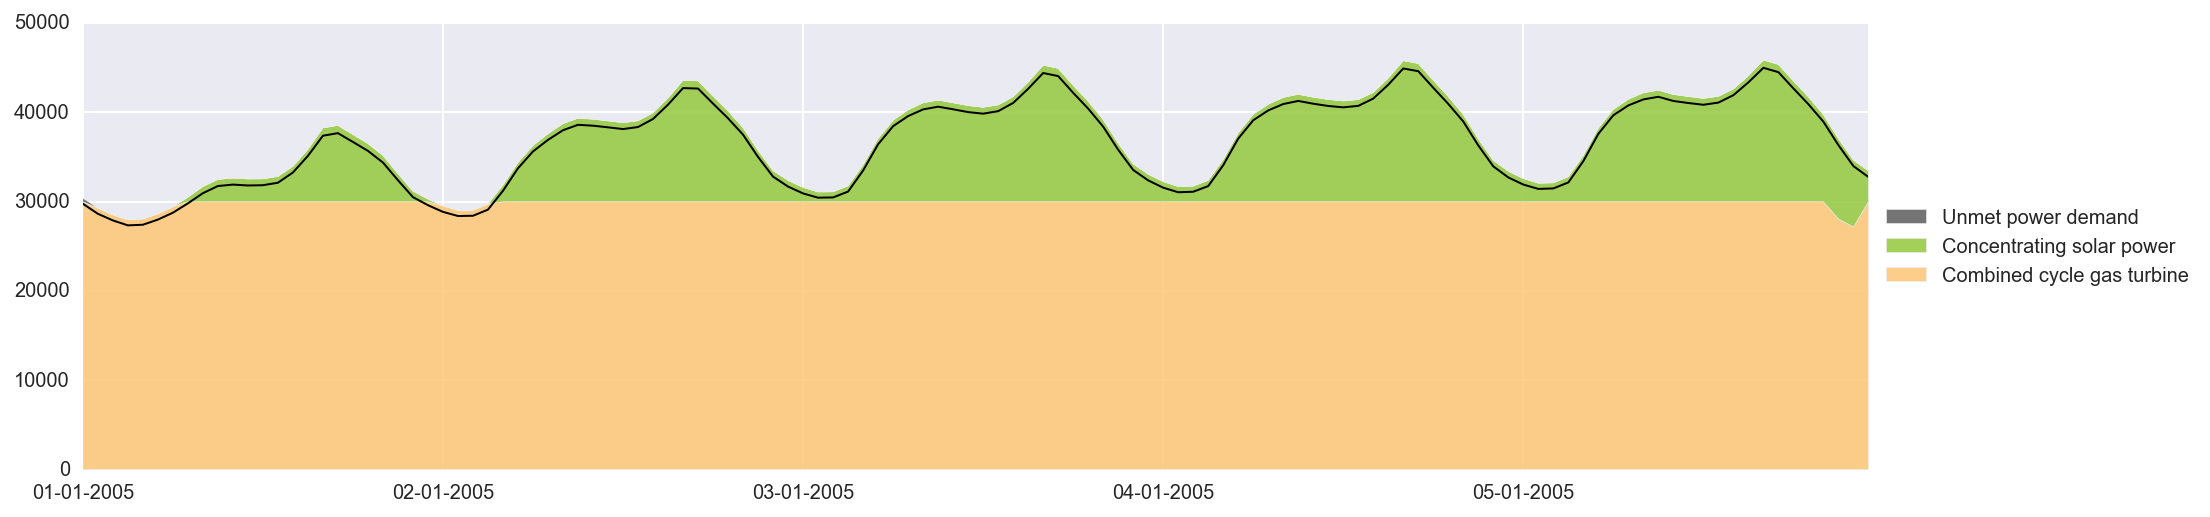

In [10]:
# We can plot this by using the plot_carrier_production function
# Note this is using the colors, names, and stack_weights defined for
# each technology in the model configuration

calliope.analysis.plot_carrier_production(model.solution, carrier='power')

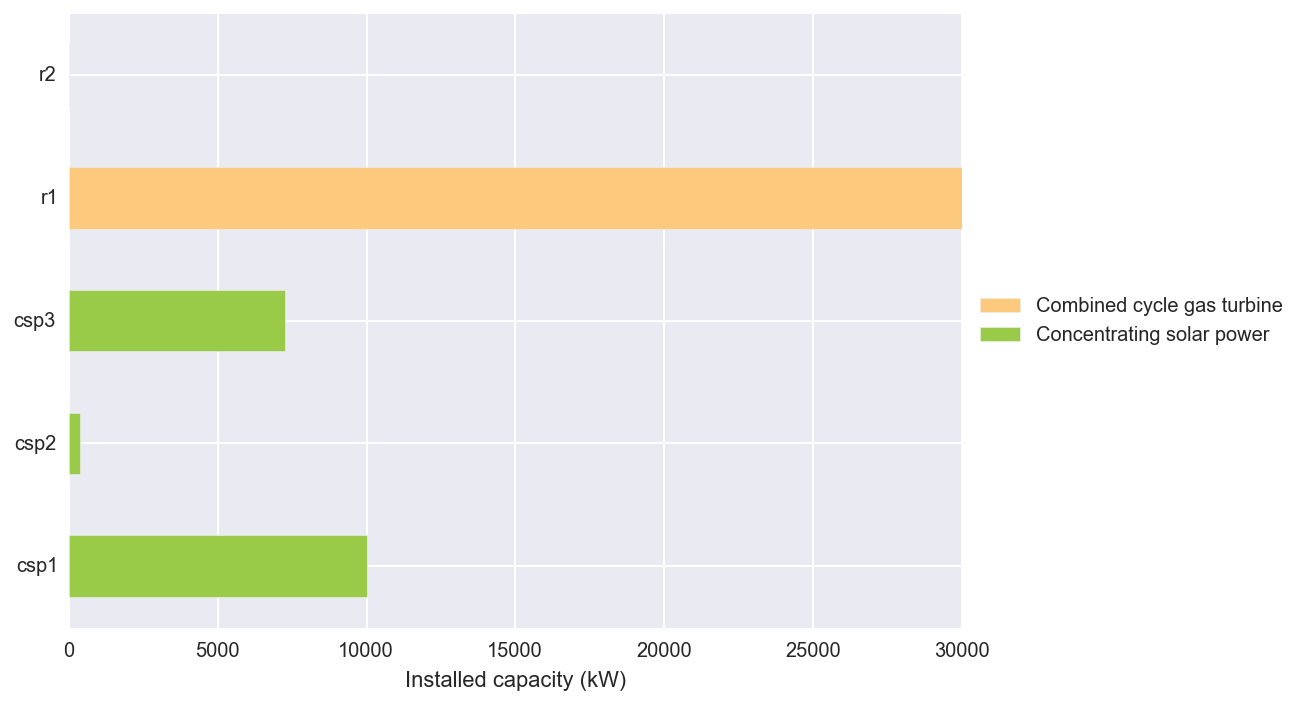

In [11]:
# plot_installed_capacities gives a graphical view of the `e_cap` variable
# for supply technologies

calliope.analysis.plot_installed_capacities(model.solution)

In [12]:
# We can also examine costs

model.solution.costs['monetary']

y,ccgt,csp,demand_power,hvac:r1,hvac:r2,unmet_demand_power
x,,,,,,
csp1,0.000000,110216.178600,0,0.000000,0.000000,0.000000e+00
csp2,0.000000,958.985692,0,0.000000,0.000000,0.000000e+00
csp3,0.000000,73766.655590,0,0.000000,0.000000,0.000000e+00
r1,177344.576069,0.000000,0,0.000000,887.736279,0.000000e+00
r2,0.000000,0.000000,0,1877.082753,0.000000,3.971896e+11


In [13]:
# Examine levelized costs for each location and technology

model.solution.levelized_cost['monetary']['power']

y,ccgt,csp,demand_power,hvac:r1,hvac:r2,unmet_demand_power
x,,,,,,
csp1,NaN,0.162794,NaN,NaN,NaN,NaN
csp2,NaN,1.262261,NaN,NaN,NaN,NaN
csp3,NaN,0.356112,NaN,NaN,NaN,NaN
r1,0.049472,NaN,NaN,NaN,0,NaN
r2,NaN,NaN,NaN,0.003795,NaN,1000000000
total,0.049472,0.208989,NaN,0.003795,0,1000000000


In [14]:
# Get an aggregated summary of results

model.solution.summary

,cf,cost_monetary,e_prod,e_con,e_cap,r_area,s_cap,type
y,,,,,,,,
demand_power,0.000000,NaN,0.000000,-4382753.095289,45000.000000,5.000000,0.000000,demand
ccgt,0.995755,4.947241e-02,3584716.585191,0.000000,30000.000000,NaN,0.000000,supply
csp,0.464318,2.089893e-01,884934.597623,0.000000,17647.058824,291151.918055,437465.207084,supply
hvac,0.700787,3.794591e-03,494673.237049,-581968.514175,11764.705882,NaN,NaN,transmission
unmet_demand_power,0.008333,1.000000e+09,397.189601,0.000000,397.189601,NaN,0.000000,unmet_demand


In [15]:
# Get levelized costs for specific locations
# (get_levelized_cost can also get specific technology groups, see its function parameters)

calliope.analysis.get_levelized_cost(model.solution, locations=['csp1', 'csp2', 'csp3'])

x
csp1    0.162794
csp2    1.262261
csp3    0.356112
dtype: float64

---

The ``calliope.analysis`` and ``calliope.analysis_utils`` modules provide numerous additional functions to analyze and plot model results. Most of them are not yet properly documented.

See the [Calliope documentation](http://docs.callio.pe/) for more details on setting up and running a Calliope model.
